O algoritmo de Metropolis é utilizado para realizar amostragens de uma função de distribuição de probabilidade difícil de ser gerada aleatoriamente.

Isto é, seja $f(x)$ a distribuição desejada, então utilizamos uma função proposta $q(y|x)$ para realizarmos essas amostragens, em que $q(y|x)$ geralmente trata-se de uma outra distribuição,  tomando $q$ simétrica, então $q(y|x)=q(x|y)$.

É conveniente fazer a distribuição $q(y|x)$ obedecer uma normal centrada em $y$.
___
<b>Algoritmo de Metropolis</b>

1. Tome um ponto $x_0$ arbitrário como primeira amostra.

2. Para t=0,1,2,...,N:

    2.1 Gere um outro ponto amostral x$^*$, em que x$^*$ é proveniente de q(x$^*$|x$_t$)

    2.2 Calcule $\alpha$ = $\frac{f(x^*)}{f(x_t)}$

    2.3 Gere um outro ponto amostral $u$ tal que $u\ \tilde{} $ Uniforme[0,1]
        
    > Se $u \leq \alpha$, aceite x$^*$ e faça:  
        > Faça que x$_{t+1}$ = x$^*$

    > Se $u > \alpha$, rejeite x$^*$ e faça :
        > Faça que x$_{t+1}$ = x$_t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Simular a distribuição beta (2.7, 6.3) usando o algoritmo de Metropolis.

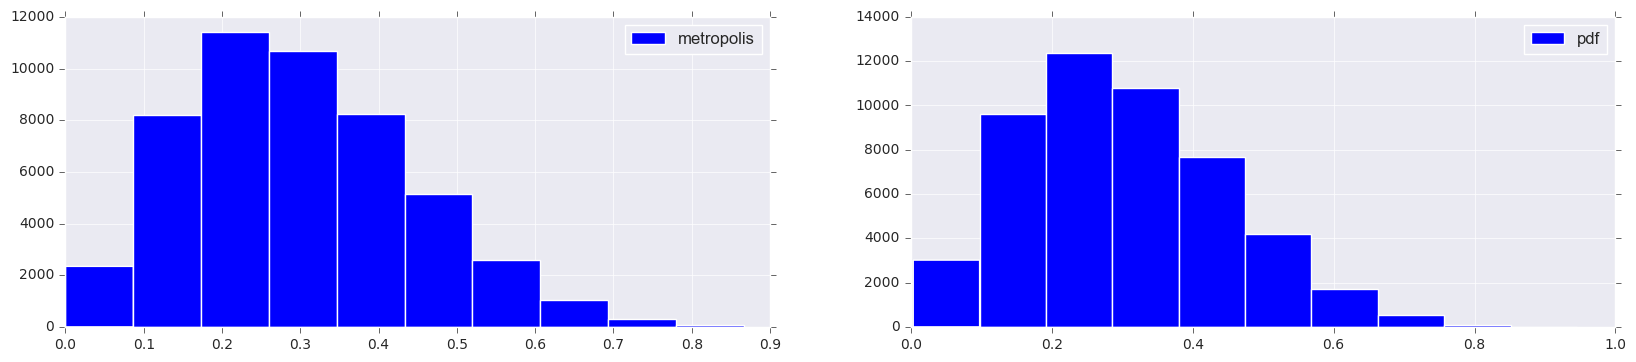

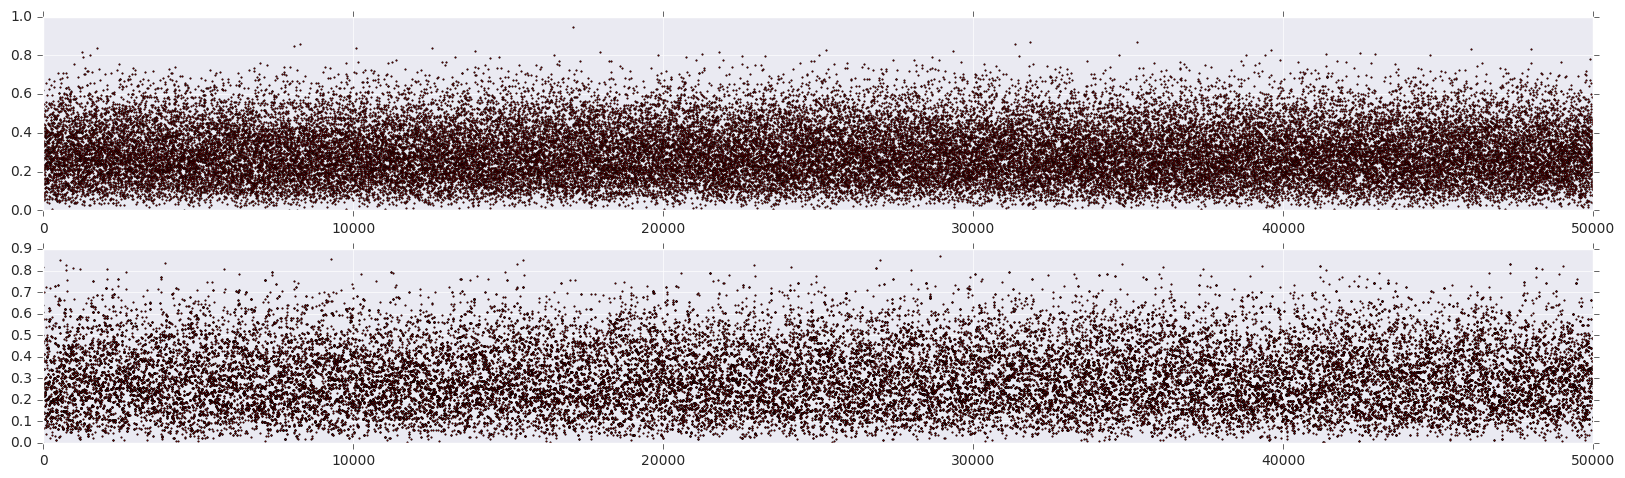

means: 0.2990237774119271 0.301050214556431
var  : 0.020886309891678275 0.02101826932976856


In [262]:
from scipy.stats import beta

def f(x,a=2.7,b=6.3):
    return beta.pdf(x,a,b)

a=2.7
b=6.3
N = 50000
x = [0 for i in range(0,N)]
x[0] = 0

for i in range(1, N):
    u = np.random.uniform(0,1)
    y = -1
#     while y>1 or y<0:
#         y = np.random.normal(x[i-1], 0.3)
    y = np.random.uniform(0,1)
    if u < min(1, f(y)/f(x[i-1])):
        x[i] = y
    else:
        x[i] = x[i-1]
        
numpy_beta = np.random.beta(a,b,N)

# plotting histograms
fig, ax = plt.subplots(1,2)
fig.set_size_inches(w=20,h=4)
ax[0].hist(x, label='metropolis')
ax[1].hist(numpy_beta, label='pdf')
ax[0].legend();ax[1].legend()
plt.show()

# plotting the scatters
fig, ax = plt.subplots(2,1)
fig.set_size_inches(20,5.5)
ax[0].plot(numpy_beta, 'ro', ms=1)
ax[1].plot(x, 'ro', ms=1)
plt.show()

print('means:', np.mean(x), np.mean(numpy_beta))
print('var  :', np.var(x), np.var(numpy_beta))

___
Considere a cadeia de Markov definida por $X^{(t+1)} = \rho X^{(t)} + \epsilon_t$, onde $\epsilon_t \tilde{}$ N(0,1). 

Simulando $X^{(0)} \tilde{} $ N(0,1), faça o plot do histograma de uma amostra de $X^{(t)}$, para $t\leq 10^4$ a $\rho=0.9$.

Verifique se a distribuição estacionária é dada por N$\left(0, \frac{1}{1-\rho^2}\right)$

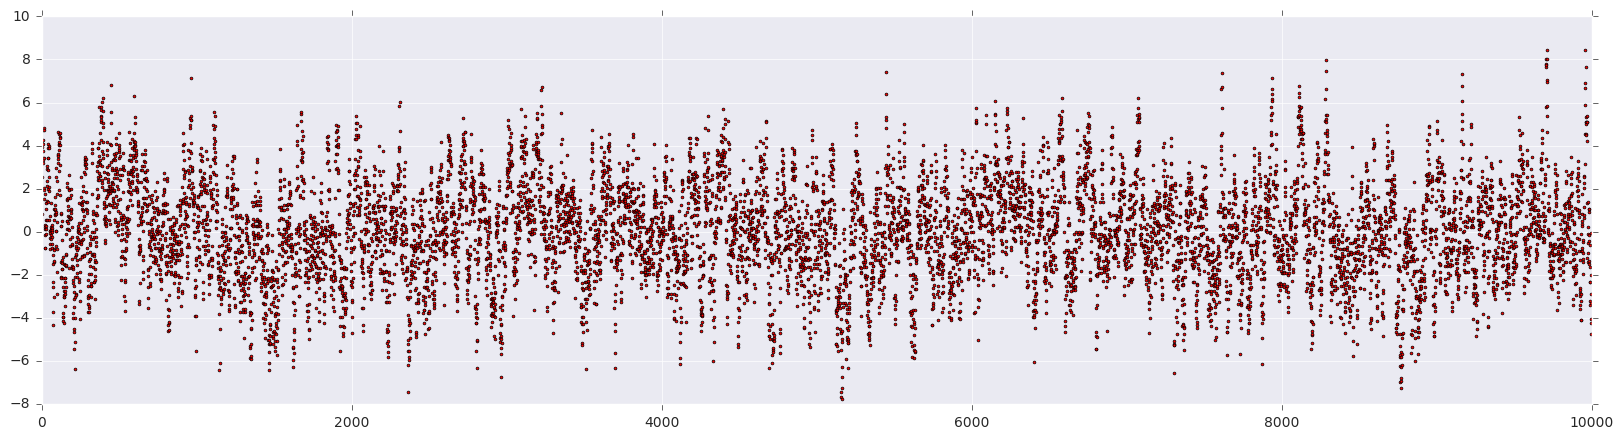

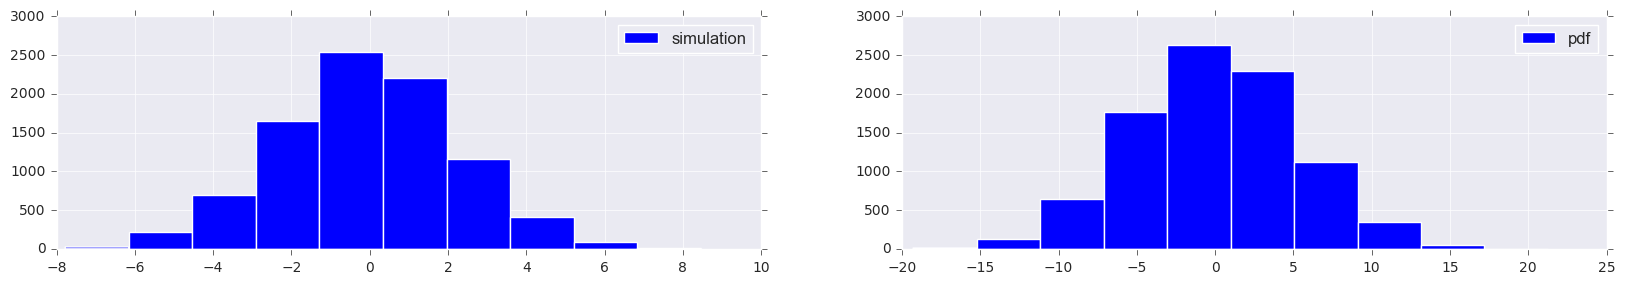

In [67]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

T = np.arange(0,10000,1)
X = [0 for i in range(len(T))]
X[0] = np.random.normal(0,1)
rho = 0.9

for i in range(1, len(T)):
    X[i] = rho*X[i-1] + np.random.normal(0,1)
    
plt.figure(figsize=(20,5))
plt.plot(X, 'ro', ms=2)
plt.show()

fig, ax = plt.subplots(nrows=1,ncols=2, sharex=False, sharey=False)
fig.set_size_inches(20,3)
ax[0].hist(X[1000:], label='simulation')
ax[1].hist(np.random.normal(0, 1/(1-np.power(rho,2)), len(T[1000:])), label='pdf')
ax[0].legend()
ax[1].legend()
plt.show()

Mostrar que o random walk (simples) não possui cadeia estacionária:

Dada a distribuição $X^{(t)}$ para $t = 10^4$ e $t = 10^6$ quando $X^{(0)} = 0$, e deduzir que $X^{(t)}$ não tem cadeia estacionária.

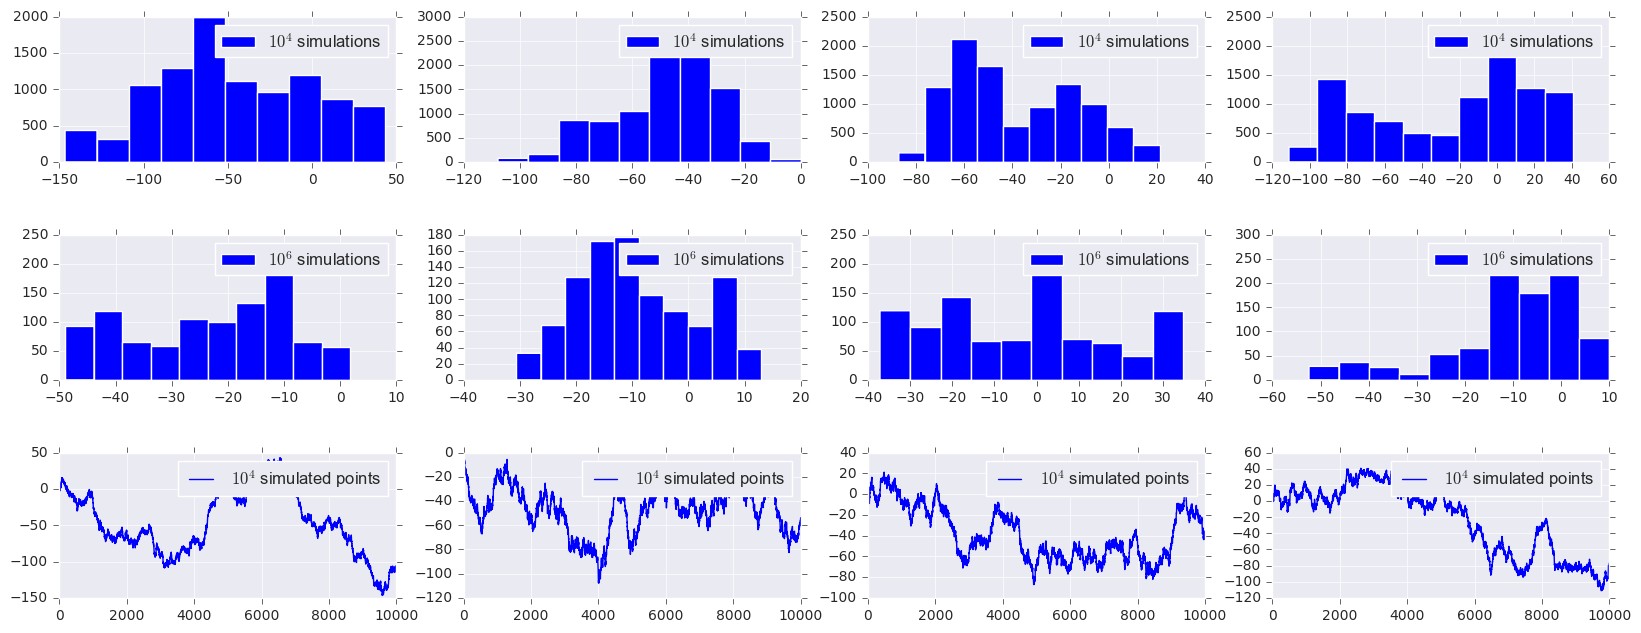

In [102]:
t1, t2 = 10000, 1000
first_rw, second_rw = [], []

for i in range(0,4):
    X_1 = [0 for i in range(t1)]
    X_1[0] = 0
    for i in range(1, t1):
        X_1[i] = X_1[i-1] + np.random.normal(0,1)
    first_rw.append(X_1)
    
for i in range(0,4):
    X_1 = [0 for i in range(t2)]
    X_1[0] = 0
    for i in range(1, t2):
        X_1[i] = X_1[i-1] + np.random.normal(0,1)
    second_rw.append(X_1)
    
fig, ax = plt.subplots(nrows=3, ncols=4)
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(w=20,h=7.5)
for i in range(0,4):
        ax[0][i].hist(first_rw[i], label='$10^4$ simulations')
        ax[0][i].legend()
        ax[1][i].hist(second_rw[i], label='$10^6$ simulations')
        ax[1][i].legend()
        ax[2][i].plot(first_rw[i], ms=2, label='$10^4$ simulated points')
        ax[2][i].legend()
plt.show()

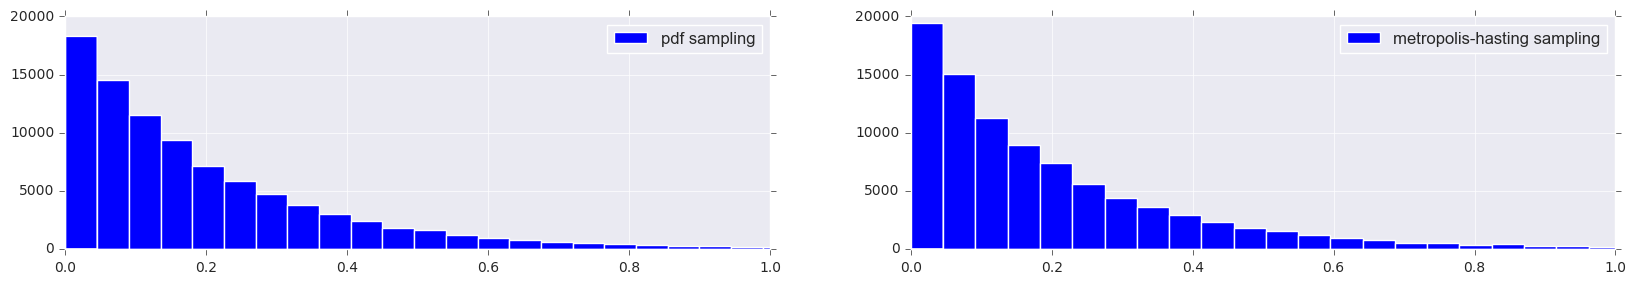

In [275]:
def f(x, theta=5):
    return theta*np.exp(-theta*x)

# Supondo que eu queira gerar exponencial (5) usando Metropolis
N = 100000
theta = 5
exponential_sampling = np.random.exponential(1/theta, N)
X = [0 for i in range(0,N)]
X[0] = 1

# Metropolis Algorithm
for i in range(1, N):
    y = np.random.normal(X[i-1], 1)
    y = abs(y)
    u = np.random.uniform(0,1)
    if u < f(y)/f(X[i-1]):
        X[i] = y
    else:
        X[i] = X[i-1]
        
fig, ax = plt.subplots(1, 2)

fig.set_size_inches(20,3)
ax[0].hist(exponential_sampling[10000:], label='pdf sampling', bins=50)
ax[1].hist(X[10000:], label='metropolis-hasting sampling', bins=50)
ax[0].legend(); ax[1].legend(); ax[0].set_xlim([0,1]); ax[1].set_xlim([0,1])
plt.show()

Calculando a média e a variância de fdp G(4.3, 6.2) utilizando o algoritmo de Metropolis, tal que nossa função auxiliar é G(4,7).

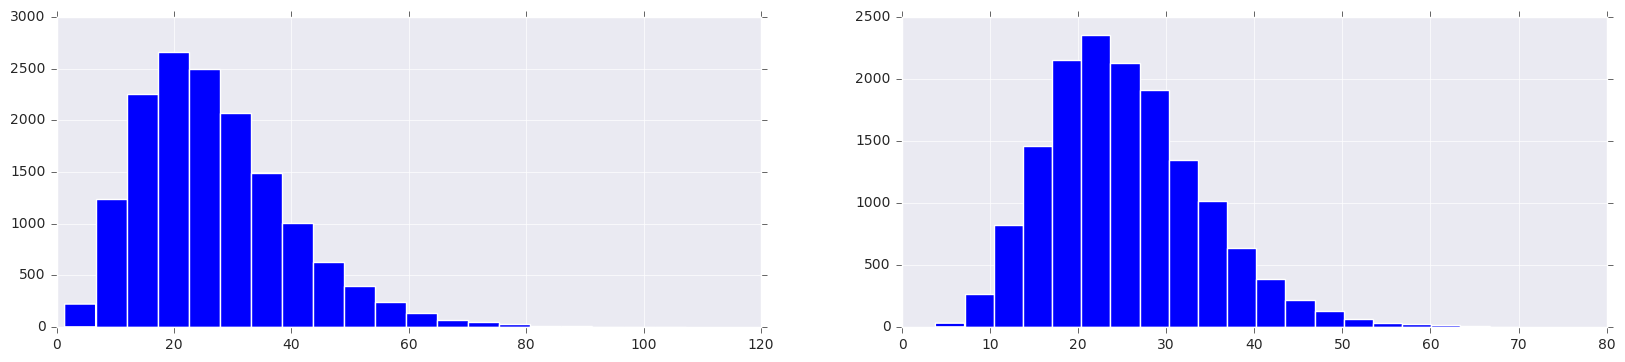

means: - pdf sampling 26.766910444258556 - metropolis sampling 25.255004070643206


In [320]:
from scipy.stats import gamma

def f(x,a=4.3,scale=6.2): 
    return gamma.pdf(x,a=a,scale=scale)


N = 15000
x = [0 for i in range(0,N)]
x[0] = 9
for i in range(1, N):
    delta = 1
    y = np.random.gamma(5,6)
    u = np.random.uniform(0,1)
    if u < min(1, f(y)/f(x[i-1])):
        x[i] = y
    else:
        x[i] = x[i-1]
        
gamma_sampling = np.random.gamma(4.3, 6.2, N)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,4)
ax[0].hist(gamma_sampling,bins=20)
ax[1].hist(x,bins=20)
plt.show()

print('means: - pdf sampling {} - metropolis sampling {}'.format(np.mean(gamma_sampling), np.mean(x)))